## Import the libraries

In [1]:
import matplotlib.pyplot as plt
import json
from pennylane import numpy as np

from utils import read_configurations
from Data_load import data_load


2024-05-14 13:46:45.343275: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 13:46:45.400423: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 13:46:46.403245: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Loaded filtered images 

In [4]:


data = data_load()
train_images, train_labels, test_images, test_labels = data.data_mnist()


config = read_configurations('./config.json')
image_PATH = '../results_2/'
n_channels = config['CHANNELS'] # Number of channels

#filtered_train_images = np.load(SAVE_PATH + "filtered_train_images_geometrical.npy")
filtered_classical_w_pooling = np.load(image_PATH + "filtered_train_images_classical_w_pooling.npy")
filtered_classical_wo_pooling = np.load(image_PATH + "filtered_train_images_classical_wo_pooling.npy")
filtered_train_images_quantum_random = np.load(image_PATH + "filtered_train_images_quantum_random.npy")
filtered_train_images_quantum_cnot = np.load(image_PATH + "filtered_train_images_quantum_cnot.npy")
filtered_train_images_geometrical = np.load(image_PATH + "filtered_train_images_geometrical.npy")

60000


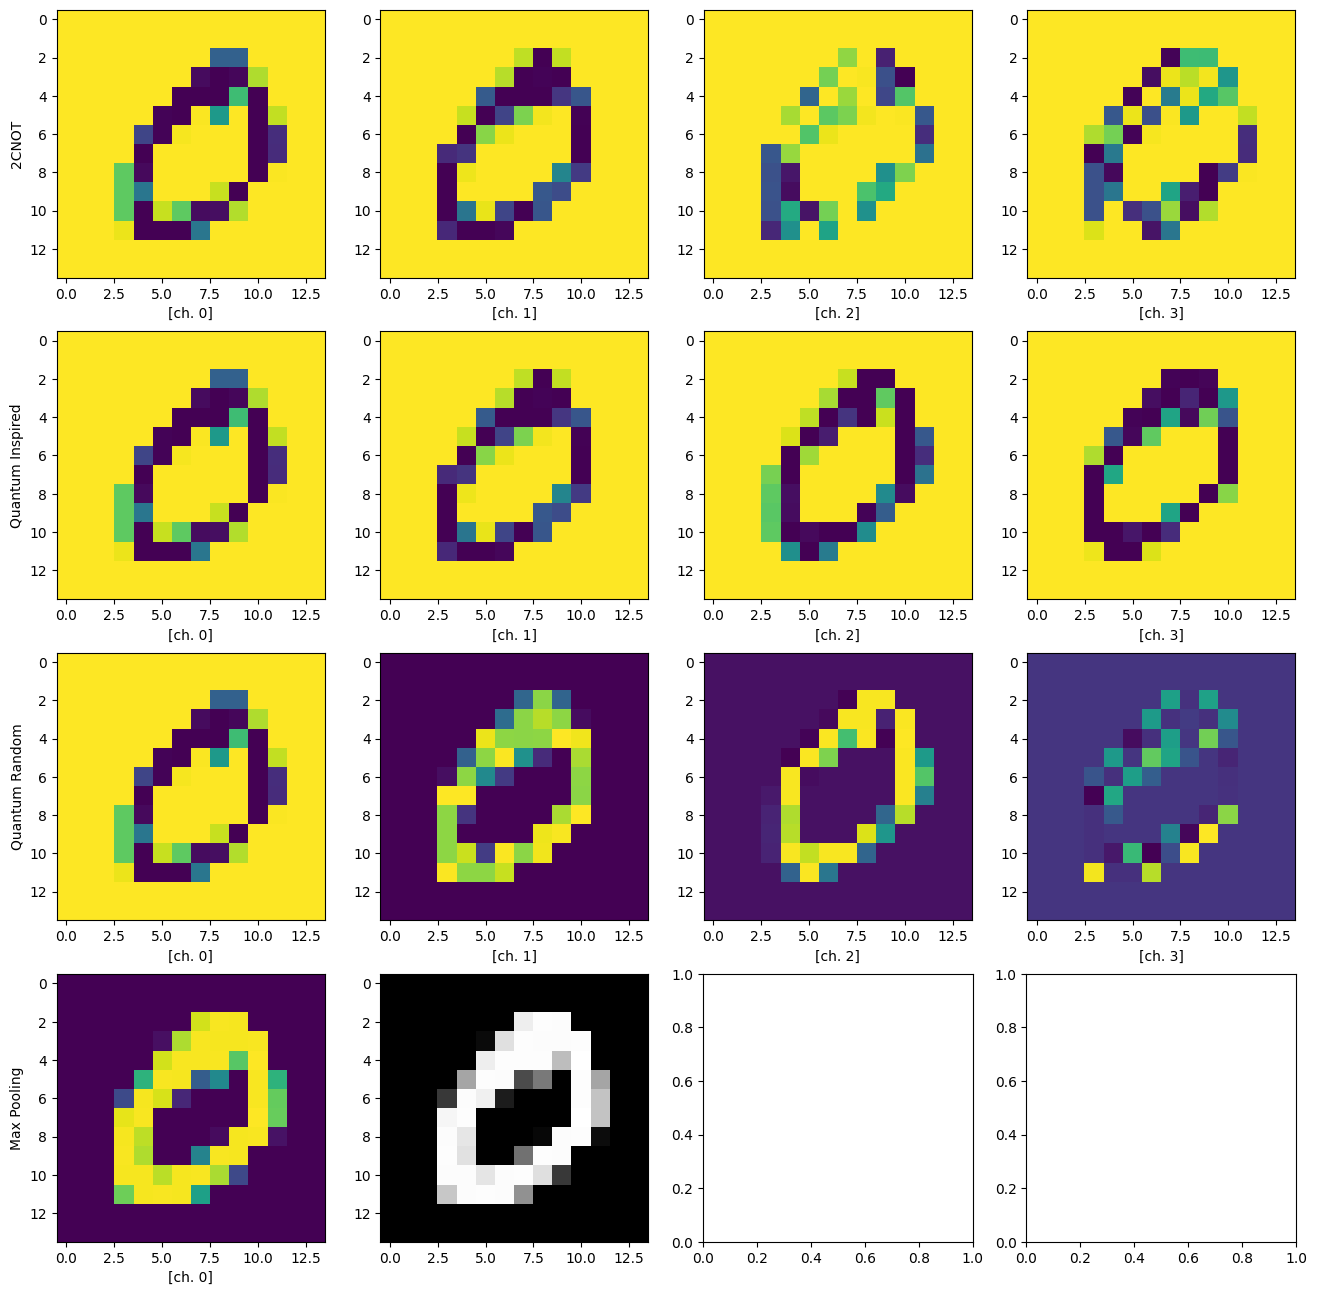

In [49]:
image_sample = 1
# vizualise the filtered images:
fig, axes = plt.subplots(4, n_channels, figsize=(16, 4*4))

# Plot all output channels for quantum cnot find TensorRT
axes[0,0].set_ylabel("2CNOT")
for c in range(n_channels):
    axes[0,c].set_xlabel("[ch. {}]".format(c))
    axes[0,c].imshow(filtered_train_images_quantum_cnot[image_sample, :, :, c])

axes[1,0].set_ylabel("Quantum Inspired")
for c in range(n_channels):
    axes[1,c].set_xlabel("[ch. {}]".format(c))
    axes[1,c].imshow(filtered_train_images_geometrical[image_sample, :, :, c])
    
axes[2,0].set_ylabel("Quantum Random")
for c in range(n_channels):
    axes[2,c].set_xlabel("[ch. {}]".format(c))
    axes[2,c].imshow(filtered_train_images_quantum_random[image_sample, :, :, c])
    
axes[3,0].set_ylabel("Max Pooling")
c=0
axes[3,c].set_xlabel("[ch. {}]".format(c))
axes[3,c].imshow(filtered_classical_w_pooling[image_sample, :, :])
# axes[3,1].imshow(filtered_classical_w_pooling[image_sample, :, :], cmap = "gray")

## Load results 

In [10]:
#load the results from Json file
with open(data.SAVE_PATH +'model_geometrical.json','r') as json_file:
    results_geomtry = json.load(json_file)
with open(data.SAVE_PATH +'model_classical_w_pooling.json','r') as json_file:
    results_classical_w_pooling = json.load(json_file)
with open(data.SAVE_PATH +'model_quantum_random.json','r') as json_file:
    results_quantum_random = json.load(json_file)
with open(data.SAVE_PATH +'model_quantum_cnot.json','r') as json_file:
    results_quantum_cnot = json.load(json_file)
with open(data.SAVE_PATH +'model_classical_wo_pooling.json','r') as json_file:
    results_classical_wo_pooling = json.load(json_file)
with open(data.SAVE_PATH +'model_full_asc.json','r') as json_file:
    results_quantum_full_asc = json.load(json_file)
with open(data.SAVE_PATH +'model_full.json','r') as json_file:
    results_quantum_full = json.load(json_file)
# with open(SAVE_PATH +'model_full_asc_last_channel.json','r') as json_file:
#     results_quantum_full_asc_last_channel = json.load(json_file)
# with open(SAVE_PATH +'model_full_last_channel.json','r') as json_file:
#     results_quantum_full_last_channel = json.load(json_file)


## Visualisation

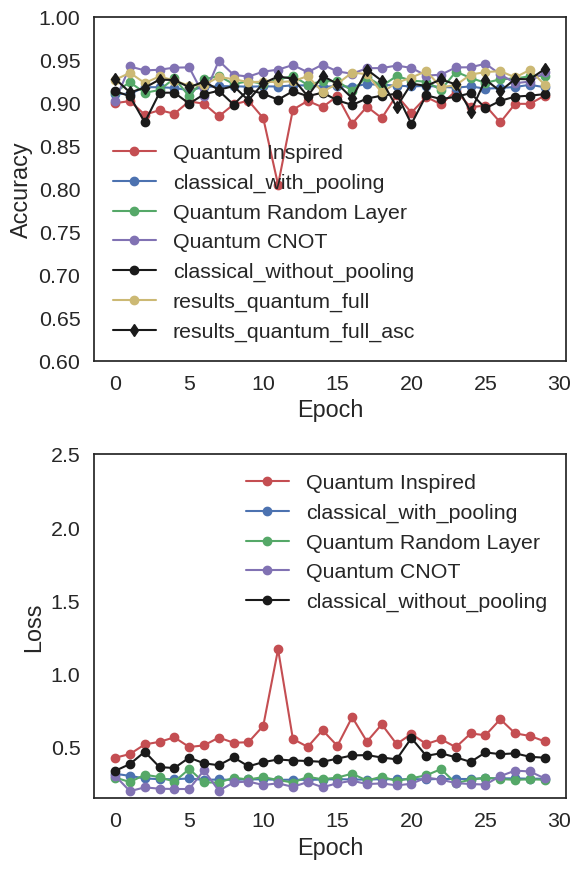

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-v0_8-ticks")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(results_geomtry["val_accuracy"], "-or", label="Quantum Inspired")
ax1.plot(results_classical_w_pooling["val_accuracy"], "-ob", label="classical_with_pooling")
ax1.plot(results_quantum_random["val_accuracy"], "-og", label="Quantum Random Layer")
ax1.plot(results_quantum_cnot["val_accuracy"], "-om", label="Quantum CNOT")
ax1.plot(results_classical_wo_pooling["val_accuracy"], "-ok", label="classical_without_pooling")
ax1.plot(results_quantum_full["val_accuracy"], "-oy", label="results_quantum_full")
ax1.plot(results_quantum_full_asc["val_accuracy"], "-dk", label="results_quantum_full_asc")
# ax1.plot(results_quantum_full_last_channel["val_accuracy"], "-sy", label="results_quantum_full_last_channel")
# ax1.plot(results_quantum_full_asc_last_channel["val_accuracy"], "--db", label="results_quantum_full_asc_last_channel")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0.6, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(results_geomtry["val_loss"], "-or", label="Quantum Inspired")
ax2.plot(results_classical_w_pooling["val_loss"], "-ob", label="classical_with_pooling")
ax2.plot(results_quantum_random["val_loss"], "-og", label="Quantum Random Layer")
ax2.plot(results_quantum_cnot["val_loss"], "-om", label="Quantum CNOT")
ax2.plot(results_classical_wo_pooling["val_loss"], "-ok", label="classical_without_pooling")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

In [ ]:
np.shape(filtered_train_images)

(50, 14, 14, 4)

In [ ]:
np.shape(train_images)

(600, 28, 28, 1)

## Making predictions and visualise the Confusion matrix

In [1]:
import tensorflow as tf
# List all available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU:", gpu)
else:
    print("No GPU devices found")

2024-05-09 22:27:10.734004: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 22:27:10.794570: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 22:27:11.845612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [1]:
import json
from Filters import Filters
from Data_load import data_load
from Model import Model
from utils import *
import time

# Import the filtered images
data = data_load()
train_images, train_labels, test_images, test_labels = data.data_mnist()


2024-05-11 05:57:23.936395: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-11 05:57:23.994427: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 05:57:24.998668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


60000


In [6]:
from tensorflow.keras.models import load_model

# my_model_test = load_model(data.SAVE_PATH+'model_quantum_cnot.keras')
my_model_test = load_model(data.SAVE_PATH+'model_full.keras')

In [11]:
# make the prediction and plot the Confusion Matrix
from tensorflow import keras
my_model = Model(10)

filtered_images = np.load("../results_2/filtered_test_images_full.npy")

y_pred, actual, label = my_model.prediction(my_model_test, keras.layers.Flatten(filtered_images), test_labels)
my_model.plot_confusion_matrix(y_pred, actual, label, ' training')

ValueError: The `data_format` argument must be one of {'channels_first', 'channels_last'}. Received: data_format=[[[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 ...


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]


 [[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  ...

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   ...
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]]

In [7]:
y_pred

<tf.Tensor: shape=(10000,), dtype=uint8, numpy=array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)>

In [6]:
actual

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([1, 7, 1, ..., 1, 1, 1])>